## Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
df=pd.read_csv("UberDataset.csv")

In [3]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


## Understanding the dataset

In [4]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
df.shape

(1156, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [9]:
df.isnull()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [11]:
df.dropna(subset=['END_DATE'],inplace=True)

In [12]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [13]:
df['PURPOSE'].fillna('NA',inplace=True)

In [14]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

## Exploratory Data Analysis

Total Number of start stations

In [15]:
start_stations = df["START"]
new_start = set(start_stations)
new_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [16]:
len(new_start)

177

Top 10 Start Stations

In [17]:
top_startstations = df["START"].value_counts()[:10].sort_values(ascending=False)

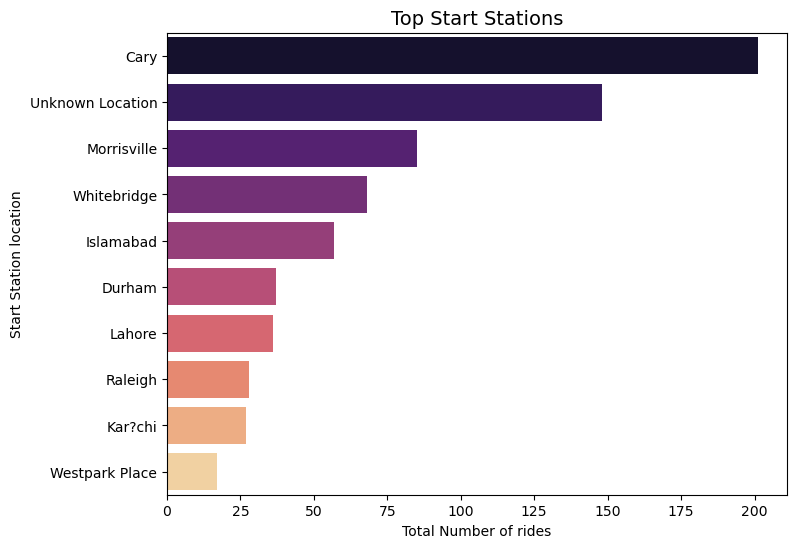

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top_startstations.values, y=top_startstations.index, palette='magma')
plt.title('Top Start Stations', fontsize=14)
plt.xlabel('Total Number of rides', fontsize=10)
plt.ylabel('Start Station location', fontsize=10)
plt.show()

Least Start Stations

In [19]:
least_startstations = df["START"].value_counts().nsmallest(5)

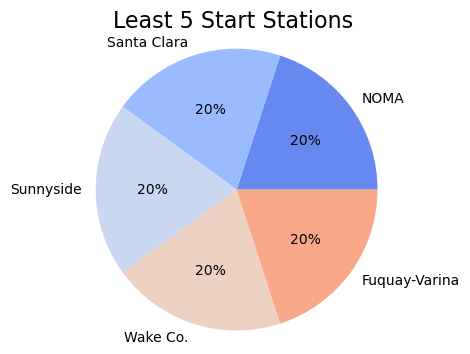

In [20]:
plt.figure(figsize=(4, 4))
palette_color = sns.color_palette('coolwarm') 
plt.pie(least_startstations, labels=least_startstations.index, colors=palette_color,  autopct='%.0f%%')
plt.title('Least 5 Start Stations ', fontsize=16)
plt.axis('equal') 
plt.show()

Total Stop Stations

In [21]:
stop_stations = df["STOP"]
new_stop = set(stop_stations)
new_stop

{'Agnew',
 'Alief',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Arts District',
 'Asheville',
 'Banner Elk',
 'Bay Farm Island',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'Bywater',
 'CBD',
 'Capitol One',
 'Cary',
 'Cedar Hill',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Convention Center District',
 'Cory',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Depot Historic District',
 'Downtown',
 'Durham',
 'Eagle Rock',
 'East Elmhurst',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Emeryville',
 'Farmington Woods',
 'Faubourg Marigny',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'French Quarter',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gramercy-Flatiron',
 'Greater Greenspoint',
 'Gulfton',
 'Harden Place',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Hog Island',

In [22]:
len(new_stop)

188

Top 10 Stop Stations

In [23]:
top_stopstations = df["STOP"].value_counts()[:10].sort_values(ascending=False)

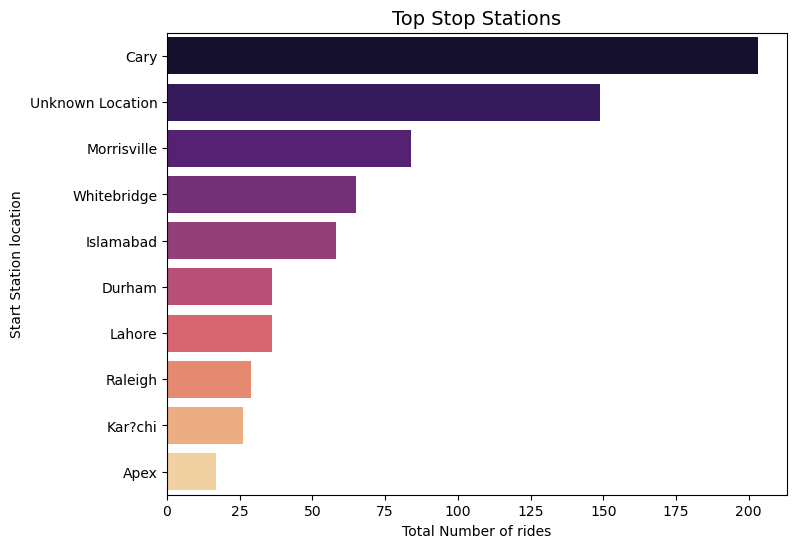

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top_stopstations.values, y=top_stopstations.index, palette='magma')
plt.title('Top Stop Stations', fontsize=14)
plt.xlabel('Total Number of rides', fontsize=10)
plt.ylabel('Start Station location', fontsize=10)
plt.show()

Least Stop Stations

In [25]:
least_stopstations = df["STOP"].value_counts().nsmallest(5)

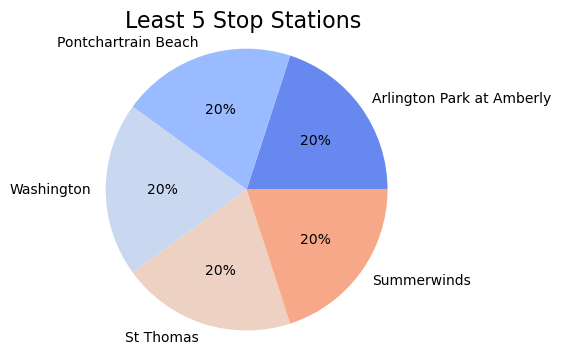

In [26]:
plt.figure(figsize=(4, 4))
palette_color = sns.color_palette('coolwarm') 
plt.pie(least_stopstations, labels=least_stopstations.index, colors=palette_color,  autopct='%.0f%%')
plt.title('Least 5 Stop Stations ', fontsize=16)
plt.axis('equal') 
plt.show()

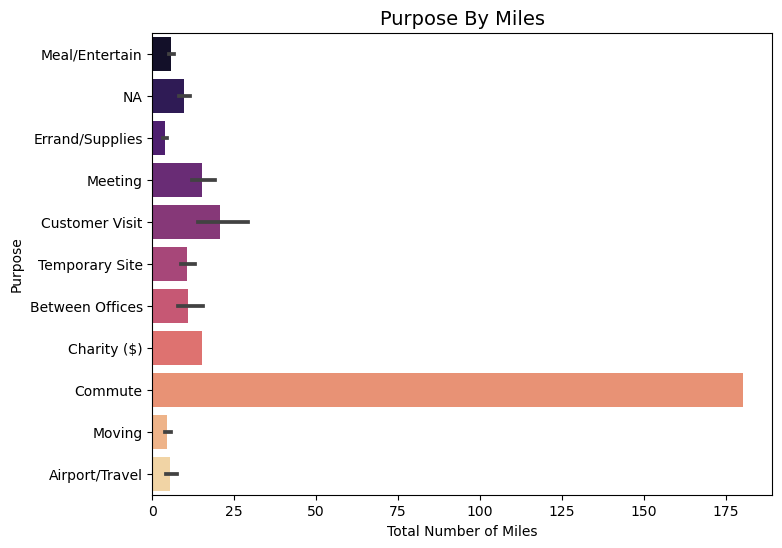

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x = df['MILES'], y = df['PURPOSE'],palette='magma')
plt.title('Purpose By Miles', fontsize=14)
plt.xlabel('Total Number of Miles', fontsize=10)
plt.ylabel('Purpose', fontsize=10)
plt.show()

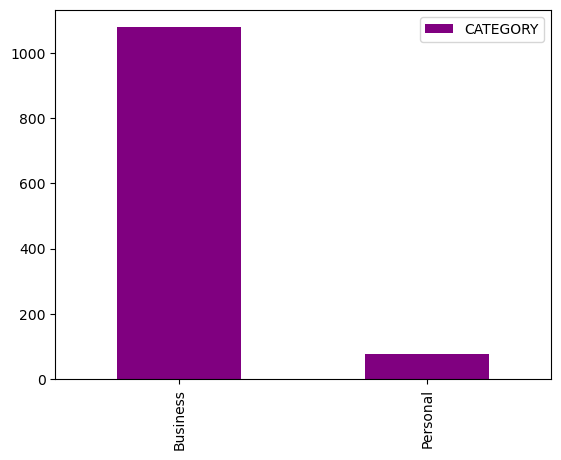

,CATEGORY
Business,1078
Personal,77


In [28]:
df.head()
cat=pd.DataFrame(df['CATEGORY'].value_counts())


cat.plot(kind = 'bar', color='purple')
plt.show()
cat

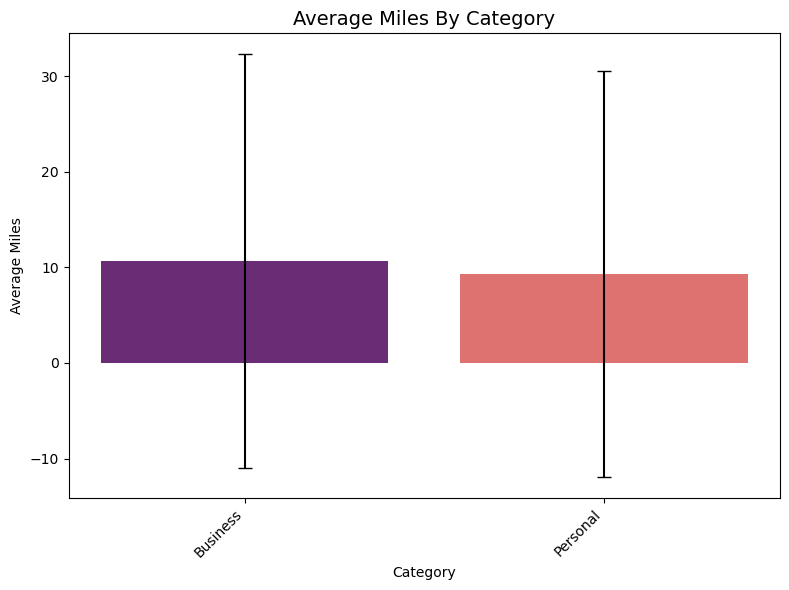

In [29]:
mean_miles = df.groupby('CATEGORY')['MILES'].mean()
std_miles = df.groupby('CATEGORY')['MILES'].std()


plt.figure(figsize=(8, 6))
sns.barplot(x=mean_miles.index, y=mean_miles.values, palette='magma')
plt.errorbar(x=mean_miles.index, y=mean_miles.values, yerr=std_miles.values, fmt='none', c='black', capsize=5)
plt.title('Average Miles By Category', fontsize=14)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Average Miles', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

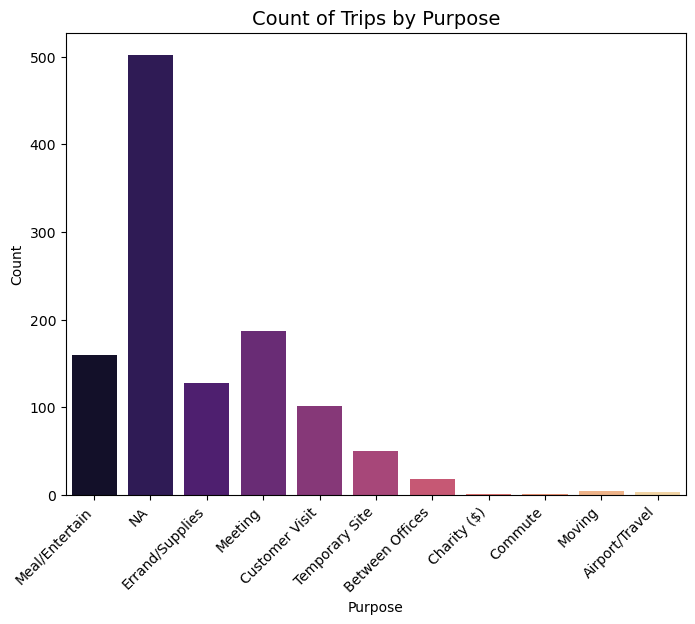

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PURPOSE', palette='magma')
plt.title('Count of Trips by Purpose', fontsize=14)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()